<a href="https://colab.research.google.com/github/YY2mk/KT_aivle/blob/master/DeepLearning/DX_%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EA%B8%B0%EC%B4%88_1%EC%9D%BC%EC%B0%A8%20%EC%8B%A4%EC%8A%B5%EC%9E%90%EB%A3%8C/03%EA%B3%BC_1_%EB%94%A5%EB%9F%AC%EB%8B%9D1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝1 : 회귀

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프

### (2) 데이터로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 준비

lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅시다.

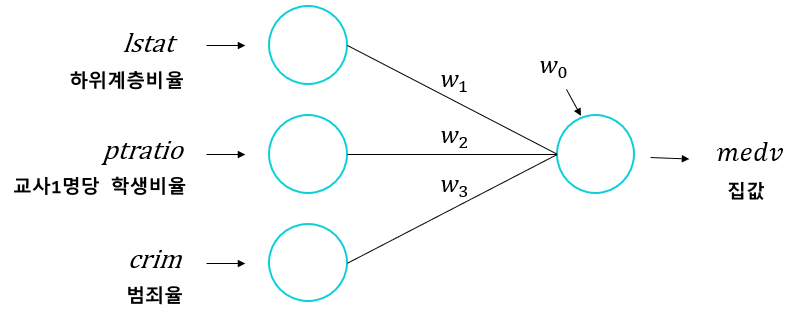

### (1) 데이터 준비
* x, y 나누기
    * x : lstat, ptratio, crim
    * y : medv

In [3]:
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) NaN 조치

### (3) 가변수화

### (4) 데이터분할

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (5) Scaling

In [5]:
# 스케일러 선언
scaler = MinMaxScaler()

# train 셋으로 fitting & 적용
x_train = scaler.fit_transform(x_train)

# validation 셋은 적용만!
x_val = scaler.transform(x_val)

## 3.딥러닝1 : 3개의 feature

### (1) 모델설계

In [6]:
# 분석단위의 shape
nfeatures = x_train.shape[1] #num of columns
nfeatures

3

In [34]:
# 메모리 정리
clear_session()

# Sequential 타입
model = Sequential(Dense(1, input_shape=(nfeatures,)))
                    # output            # input
# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile
    * optimizer = 'adam'    : 기본값으로 옵티마이저 사용(learning_rate = 0.001)
    * optimizer = Adam(lr = 0.1) : 옵션 값 조정 가능
        * lr과 learning_rate은 같지만, learning_rate 사용을 권장

In [35]:
model.compile(optimizer=Adam(0.1), loss='mse')

### (2) 학습

validation_split=0.2 : 학습시, 학습용 데이터에서 0.2 만큼 떼어 내서 검증셋으로 활용

In [36]:
history = model.fit(x_train , y_train, epochs = 20, validation_split=0.2).history
                                    # 20번 반복       # 20%를 검증셋 분리  # 가중치가 업데이트 되면서 그때그때마다의 성능을 측정하여 기록

Epoch 1/20
11/11 [==============================] - 1s 22ms/step - loss: 518.1815 - val_loss: 456.4966
Epoch 2/20
11/11 [==============================] - 0s 7ms/step - loss: 342.1980 - val_loss: 315.6486
Epoch 3/20
11/11 [==============================] - 0s 8ms/step - loss: 236.4032 - val_loss: 238.3555
Epoch 4/20
11/11 [==============================] - 0s 7ms/step - loss: 183.3738 - val_loss: 202.0274
Epoch 5/20
11/11 [==============================] - 0s 6ms/step - loss: 160.7343 - val_loss: 181.8968
Epoch 6/20
11/11 [==============================] - 0s 7ms/step - loss: 146.7394 - val_loss: 165.9303
Epoch 7/20
11/11 [==============================] - 0s 7ms/step - loss: 134.6086 - val_loss: 152.1724
Epoch 8/20
11/11 [==============================] - 0s 9ms/step - loss: 124.5222 - val_loss: 139.3053
Epoch 9/20
11/11 [==============================] - 0s 8ms/step - loss: 114.9785 - val_loss: 127.3080
Epoch 10/20
11/11 [==============================] - 0s 7ms/step - loss: 106.3456

* 학습결과 그래프

In [37]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

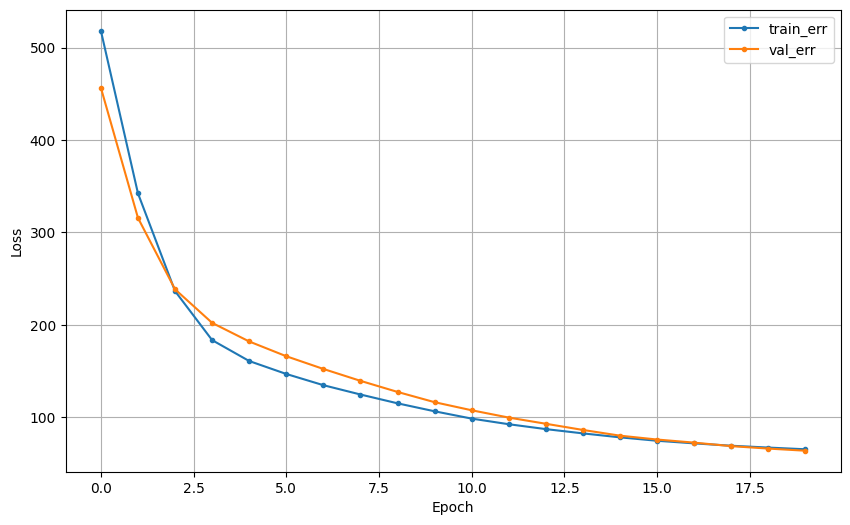

In [38]:
dl_history_plot(history)

### (3) 예측 및 검증

In [39]:
pred = model.predict(x_val)

4/4 [==============================] - 0s 3ms/step


In [40]:
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

RMSE : 6.950386677183718
MAE  : 4.948413884405998
MAPE : 0.2519252652659587


## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [41]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [42]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [43]:
nfeatures = x_train.shape[1]
nfeatures

12

In [44]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model2 =Sequential(Dense(1, input_shape = (nfeatures,)))

# 모델요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [45]:
model2.compile(optimizer=Adam(0.1), loss='mse')

* 학습

In [48]:
history = model2.fit(x_train , y_train, epochs = 20, validation_split=0.2).history

Epoch 1/20
11/11 [==============================] - 1s 31ms/step - loss: 504.4330 - val_loss: 442.0331
Epoch 2/20
11/11 [==============================] - 0s 11ms/step - loss: 330.4849 - val_loss: 304.7272
Epoch 3/20
11/11 [==============================] - 0s 10ms/step - loss: 229.2275 - val_loss: 231.9848
Epoch 4/20
11/11 [==============================] - 0s 10ms/step - loss: 179.4115 - val_loss: 197.6790
Epoch 5/20
11/11 [==============================] - 0s 12ms/step - loss: 157.5410 - val_loss: 178.3222
Epoch 6/20
11/11 [==============================] - 0s 10ms/step - loss: 143.2843 - val_loss: 162.4291
Epoch 7/20
11/11 [==============================] - 0s 9ms/step - loss: 131.9949 - val_loss: 148.3194
Epoch 8/20
11/11 [==============================] - 0s 8ms/step - loss: 121.5890 - val_loss: 136.0061
Epoch 9/20
11/11 [==============================] - 0s 7ms/step - loss: 112.3518 - val_loss: 123.8257
Epoch 10/20
11/11 [==============================] - 0s 8ms/step - loss: 103

* 학습결과 그래프

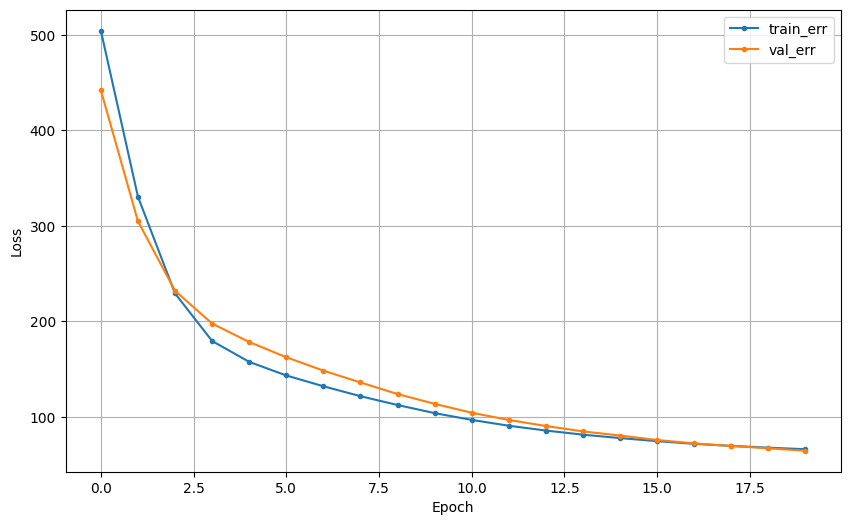

In [49]:
dl_history_plot(history)

* 예측 및 평가

In [51]:
pred2 = model2.predict(x_val)

print(f'RMSE : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 6.988840926795755
MAE  : 4.967330549277513
MAPE : 0.24785881013654562


## 5.실습!
* 위 4번에 이어서, 여러분은 다음을 조절할 수 있습니다.
    * epochs(반복횟수), learning_rate(학습율)
* 4번 코드를 그대로 보면서 작성하고 위 두가지를 조절하며 성능을 높여봅시다!

### (1) 데이터 전처리

* 데이터 분할

In [52]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [53]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [54]:
nfeatures = x_train.shape[1]
nfeatures

12

In [95]:
clear_session()
model = Sequential(Dense(1, input_shape = (nfeatures,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [96]:
model.compile(optimizer=Adam(0.2), loss='mse')

* 학습

In [97]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2).history

Epoch 1/20
11/11 [==============================] - 1s 22ms/step - loss: 430.6400 - val_loss: 296.4463
Epoch 2/20
11/11 [==============================] - 0s 7ms/step - loss: 202.8281 - val_loss: 187.4020
Epoch 3/20
11/11 [==============================] - 0s 8ms/step - loss: 150.0531 - val_loss: 164.2988
Epoch 4/20
11/11 [==============================] - 0s 7ms/step - loss: 134.1273 - val_loss: 140.2191
Epoch 5/20
11/11 [==============================] - 0s 6ms/step - loss: 111.8454 - val_loss: 114.3371
Epoch 6/20
11/11 [==============================] - 0s 6ms/step - loss: 95.1658 - val_loss: 100.8489
Epoch 7/20
11/11 [==============================] - 0s 8ms/step - loss: 86.4942 - val_loss: 87.4221
Epoch 8/20
11/11 [==============================] - 0s 6ms/step - loss: 76.2850 - val_loss: 74.6997
Epoch 9/20
11/11 [==============================] - 0s 8ms/step - loss: 69.3516 - val_loss: 67.3232
Epoch 10/20
11/11 [==============================] - 0s 8ms/step - loss: 65.3635 - val_l

* 학습결과 그래프

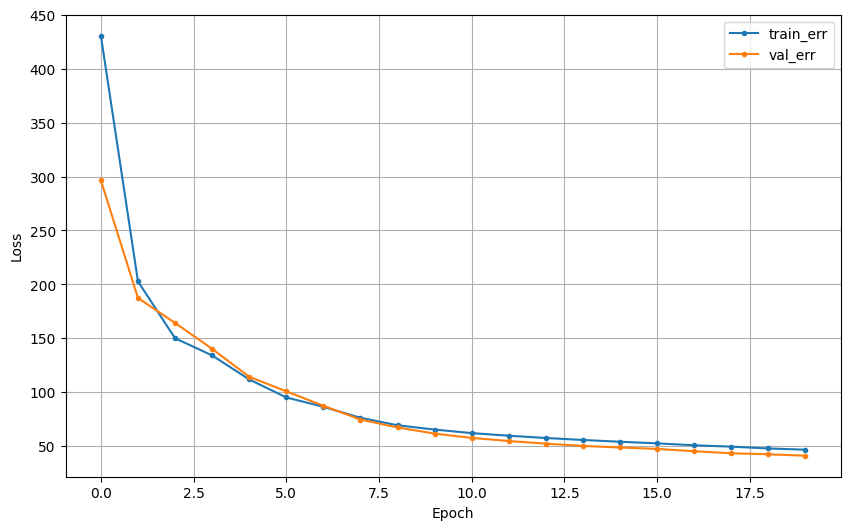

In [98]:
dl_history_plot(history)

* 예측 및 평가

In [99]:
pred = model.predict(x_val)

print('RMSE:', mean_squared_error(y_val, pred, squared=False))
print('='*60)
print('MAE:', mean_absolute_error(y_val, pred))
print('='*60)
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

4/4 [==============================] - 0s 3ms/step
RMSE: 5.961475859128757
MAE: 4.457365878423055
MAPE: 0.22097037018113536


----

## 5.딥러닝3 : hidden layer!
* 이제 레이어를 추가해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [77]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [78]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [79]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [80]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언(입력은 리스트로!) # 레이터 2개 이상은 리스트로 작성
model3 = Sequential([  Dense(2, input_shape = (nfeatures,), activation = 'relu'),
                       Dense(1)   ])

# 모델요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 26        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 29 (116.00 Byte)
Trainable params: 29 (116.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [81]:
model3.compile( optimizer= Adam(learning_rate=0.1), loss = 'mse')

* 학습

In [82]:
hist = model3.fit(x_train, y_train, epochs = 50 , validation_split= .2 ).history

Epoch 1/50
11/11 [==============================] - 1s 18ms/step - loss: 575.8677 - val_loss: 603.6304
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 528.4986 - val_loss: 555.8939
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 483.9217 - val_loss: 511.7329
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 443.8973 - val_loss: 470.4511
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 406.0522 - val_loss: 432.4499
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 371.1201 - val_loss: 397.6392
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 339.0465 - val_loss: 364.7346
Epoch 8/50
11/11 [==============================] - 0s 4ms/step - loss: 310.1269 - val_loss: 336.2792
Epoch 9/50
11/11 [==============================] - 0s 6ms/step - loss: 285.0302 - val_loss: 310.7527
Epoch 10/50
11/11 [==============================] - 0s 7ms/step - loss: 262.1034

* 학습결과 그래프

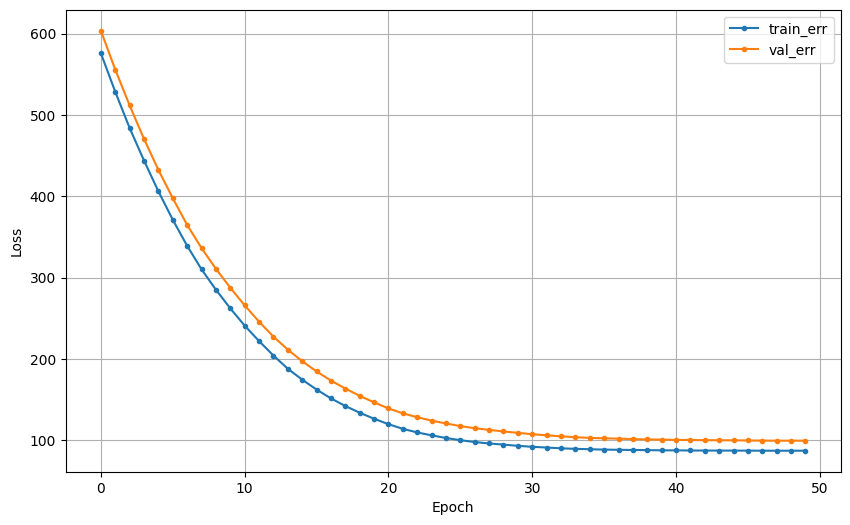

In [83]:
dl_history_plot(hist)

* 예측 및 평가

In [84]:
pred3 = model3.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred3, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred3)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred3)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 8.049523194590314
MAE  : 5.496162048040652
MAPE : 0.3189378401797094


### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # |
| ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 |
| dense_1 (Dense) | (None, 1) | 9 |     

In [107]:
clear_session()
model = Sequential([Dense(8, input_shape=(nfeatures, )),
                    Dense(1, )])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [108]:
model.compile(optimizer=Adam(0.1), loss='mse')
hist = model.fit(x_train, y_train, epochs=20, validation_split=0.2).history

Epoch 1/20
11/11 [==============================] - 1s 22ms/step - loss: 334.6101 - val_loss: 200.3792
Epoch 2/20
11/11 [==============================] - 0s 7ms/step - loss: 142.0729 - val_loss: 131.7999
Epoch 3/20
11/11 [==============================] - 0s 8ms/step - loss: 88.8284 - val_loss: 66.1786
Epoch 4/20
11/11 [==============================] - 0s 8ms/step - loss: 71.0798 - val_loss: 55.7986
Epoch 5/20
11/11 [==============================] - 0s 7ms/step - loss: 60.3257 - val_loss: 44.8203
Epoch 6/20
11/11 [==============================] - 0s 7ms/step - loss: 50.4952 - val_loss: 37.4636
Epoch 7/20
11/11 [==============================] - 0s 7ms/step - loss: 42.0382 - val_loss: 39.8750
Epoch 8/20
11/11 [==============================] - 0s 8ms/step - loss: 40.8949 - val_loss: 33.9553
Epoch 9/20
11/11 [==============================] - 0s 5ms/step - loss: 37.0261 - val_loss: 23.0622
Epoch 10/20
11/11 [==============================] - 0s 6ms/step - loss: 32.7690 - val_loss: 26

* 학습곡선

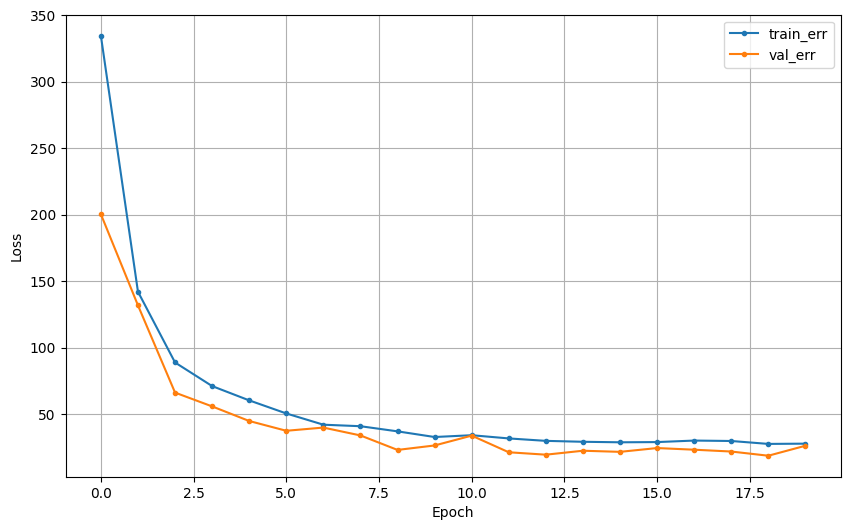

In [109]:
dl_history_plot(hist)

* 검증

In [110]:
pred = model.predict(x_val)
print('RMSE:', mean_squared_error(y_val, pred , squared=False))
print('MAE:', mean_absolute_error(y_val, pred))
print('MAPE: ', mean_absolute_percentage_error(y_val, pred))

4/4 [==============================] - 0s 3ms/step
RMSE: 4.509549114778724
MAE: 3.2778604025934257
MAPE:  0.16598983270966736


### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 112 | node, input_shape, activation |
| dense_1 (Dense) | (None, 4) | 36 | node, activation |
| dense_2 (Dense) | (None, 1) | 5 | node |

In [130]:
clear_session()
model = Sequential([Dense(8, input_shape = (nfeatures,), activation = 'relu'),
                    Dense(4, activation = 'relu'),
                    Dense(1)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 145 (580.00 Byte)
Trainable params: 145 (580.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [131]:
model.compile(optimizer=Adam(0.1), loss='mse')
hist = model.fit(x_train, y_train, epochs=20, validation_split=0.2).history

Epoch 1/20
11/11 [==============================] - 1s 19ms/step - loss: 427.6231 - val_loss: 205.2241
Epoch 2/20
11/11 [==============================] - 0s 5ms/step - loss: 138.5264 - val_loss: 127.3764
Epoch 3/20
11/11 [==============================] - 0s 5ms/step - loss: 81.0397 - val_loss: 62.4943
Epoch 4/20
11/11 [==============================] - 0s 7ms/step - loss: 72.8263 - val_loss: 63.3644
Epoch 5/20
11/11 [==============================] - 0s 7ms/step - loss: 59.3638 - val_loss: 41.2012
Epoch 6/20
11/11 [==============================] - 0s 7ms/step - loss: 49.9108 - val_loss: 42.3057
Epoch 7/20
11/11 [==============================] - 0s 7ms/step - loss: 45.0765 - val_loss: 29.6143
Epoch 8/20
11/11 [==============================] - 0s 5ms/step - loss: 42.5264 - val_loss: 32.9538
Epoch 9/20
11/11 [==============================] - 0s 5ms/step - loss: 48.2902 - val_loss: 37.4191
Epoch 10/20
11/11 [==============================] - 0s 8ms/step - loss: 34.8551 - val_loss: 25

* 학습곡선

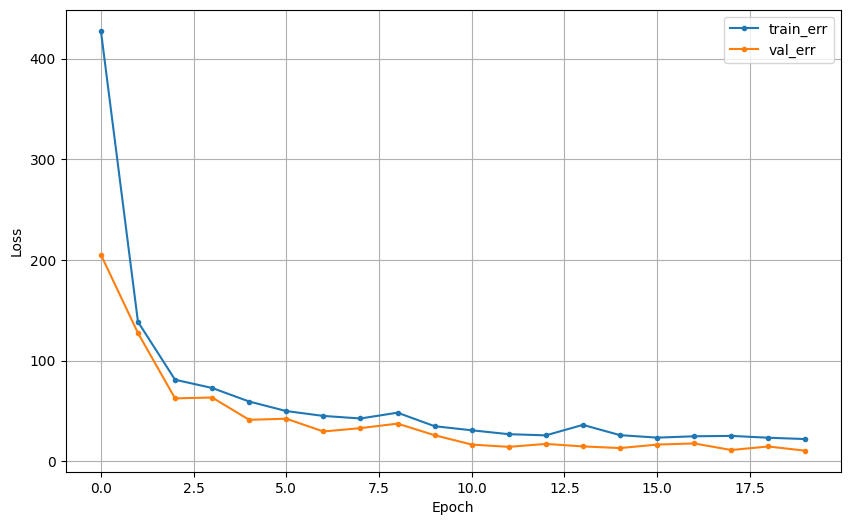

In [132]:
dl_history_plot(hist)

* 검증

In [133]:
pred = model.predict(x_val)
print('RMSE:', mean_squared_error(y_val, pred))
print('MAE:', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

4/4 [==============================] - 0s 4ms/step
RMSE: 17.968257299126716
MAE: 3.317481493482403
MAPE: 0.17787997410623801


### (5) 실습3

* 이번에는 여러분이 원하는 대로 설계하고, 학습해 봅시다.


In [134]:
nfeatures

12

In [147]:
clear_session()
model = Sequential([Dense(6, input_shape = (nfeatures,), activation = 'relu'),
                    Dense(3, activation = 'relu'),
                    Dense(1)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 78        
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [148]:
model.compile(optimizer=Adam(0.01), loss='mse')
hist = model.fit(x_train, y_train, epochs=30, validation_split=0.2).history

Epoch 1/30
11/11 [==============================] - 1s 19ms/step - loss: 558.5649 - val_loss: 566.6801
Epoch 2/30
11/11 [==============================] - 0s 5ms/step - loss: 470.9622 - val_loss: 452.8933
Epoch 3/30
11/11 [==============================] - 0s 6ms/step - loss: 343.7016 - val_loss: 298.1635
Epoch 4/30
11/11 [==============================] - 0s 6ms/step - loss: 201.9762 - val_loss: 182.8103
Epoch 5/30
11/11 [==============================] - 0s 5ms/step - loss: 145.7792 - val_loss: 159.1460
Epoch 6/30
11/11 [==============================] - 0s 5ms/step - loss: 128.6082 - val_loss: 136.0659
Epoch 7/30
11/11 [==============================] - 0s 5ms/step - loss: 112.2218 - val_loss: 120.2180
Epoch 8/30
11/11 [==============================] - 0s 7ms/step - loss: 100.0900 - val_loss: 103.3029
Epoch 9/30
11/11 [==============================] - 0s 5ms/step - loss: 89.2927 - val_loss: 88.9196
Epoch 10/30
11/11 [==============================] - 0s 6ms/step - loss: 79.5320 - 

* 학습곡선

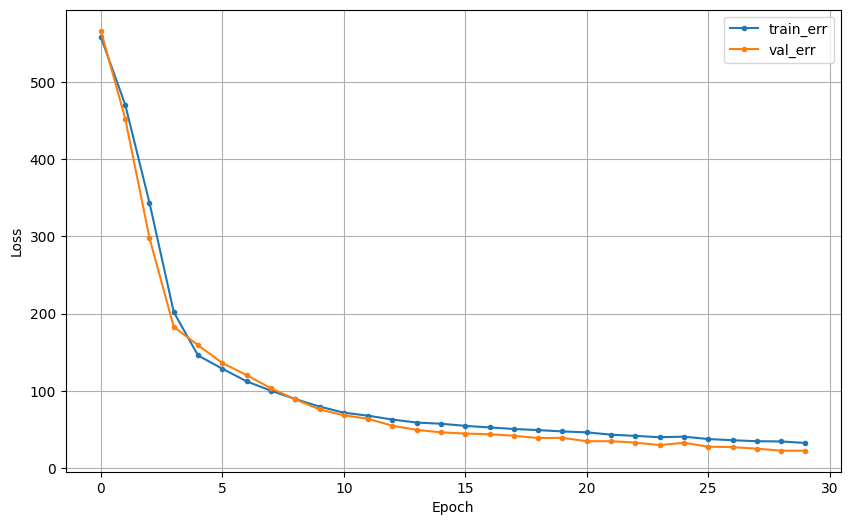

In [149]:
dl_history_plot(hist)

* 검증

In [150]:
pred = model.predict(x_val)
print('RMSE:', mean_squared_error(y_val, pred))
print('MAE:', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

4/4 [==============================] - 0s 3ms/step
RMSE: 26.29961238339186
MAE: 3.976156008477305
MAPE: 0.20026681963903242
